In [1]:
import numpy as np
import pandas as pd
from typing import Dict, List, Tuple
from PIL import Image
import os
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader

from data import DataHandler
from data import criterion_weight
from config import Config
import utils
from models.test_model import TestModel

In [25]:
%matplotlib inline
root_path = "./dataset"
run_type = "valid"
df = pd.read_csv(root_path + "/CheXpert-v1.0-small/" + run_type + ".csv")
label_cols = df.columns[5:]

competition_idxs = [7, 10, 11, 13, 15]
competition_cols = df.columns[competition_idxs]

In [26]:
df[label_cols] = df[label_cols].fillna(0)
df = df[df["Frontal/Lateral"] == "Frontal"]
df = df.reset_index()

Cardiomegaly        1
Edema               0
Consolidation       0
Atelectasis         0
Pleural Effusion    0
Name: 0, dtype: object

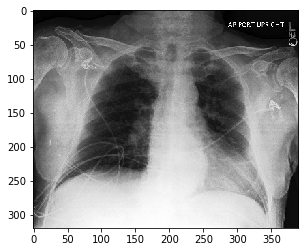

In [30]:
record = df.iloc[0]
img_path = os.path.join(root_path, record["Path"])
image = Image.open(img_path)
imgplot = plt.imshow(image)
record[competition_cols]

In [35]:
model_save_path = "./test_model.pt"
model = TestModel()
model.load_state_dict(torch.load(model_save_path))
_ = model.eval()

In [45]:
data_handler = DataHandler(Config)
train_dataset, valid_dataset = data_handler.get_datasets()
x = torch.unsqueeze(valid_dataset[0][0], 0)
y = model(x)
label_cols[y.argmax().item()]

'Pleural Effusion'